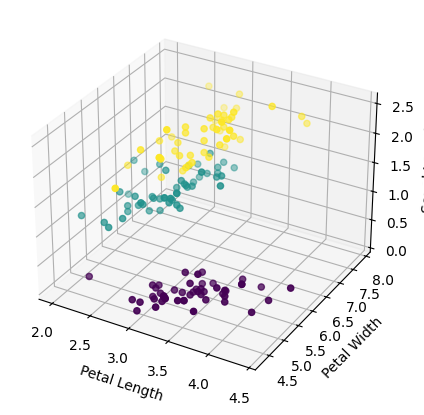

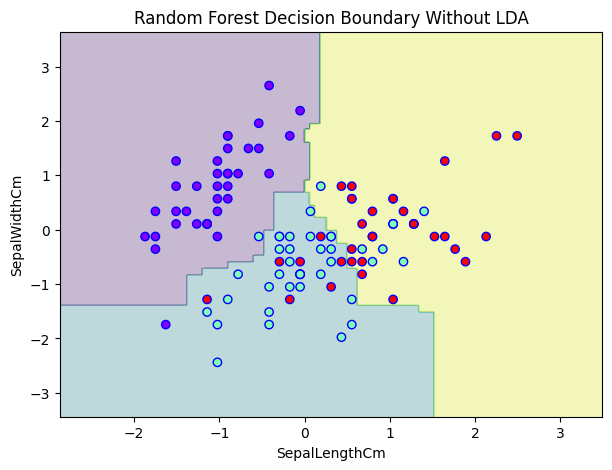

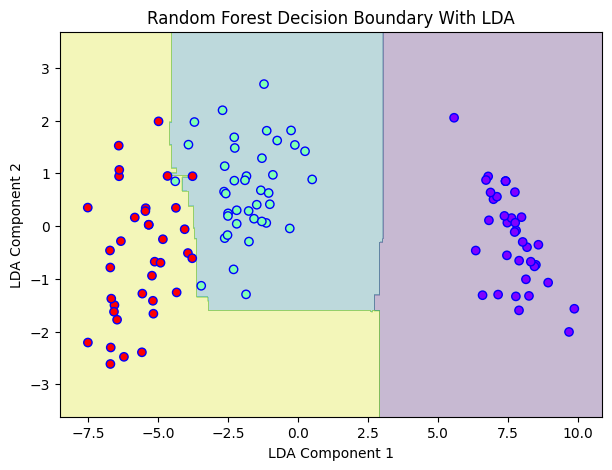

In [33]:
#Linear Discriminant Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df=pd.read_csv('D:\\AppStoneLab\\Day-wise\\Day 2\\Iris.csv')

X=df.drop(columns=['Species', 'Id'], axis=1)
y=df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})


fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X['SepalWidthCm'], X['SepalLengthCm'], X['PetalWidthCm'], c=y)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
plt.show()

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=100)

X_train_2D = X_train[:, :2]

rf_without_lda = RandomForestClassifier(max_depth=2, random_state=100)
rf_without_lda.fit(X_train_2D, y_train)

x_min, x_max = X_train_2D[:,0].min() - 1, X_train_2D[:,0].max() + 1
y_min, y_max = X_train_2D[:,1].min() - 1, X_train_2D[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = rf_without_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_2D[:,0], X_train_2D[:,1], c=y_train, cmap='rainbow', edgecolors='b')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Random Forest Decision Boundary Without LDA')
plt.show()

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

rf_with_lda = RandomForestClassifier(max_depth=2, random_state=0)
rf_with_lda.fit(X_train_lda, y_train)

x_min, x_max = X_train_lda[:,0].min() - 1, X_train_lda[:,0].max() + 1
y_min, y_max = X_train_lda[:,1].min() - 1, X_train_lda[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = rf_with_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap='rainbow', edgecolors='b')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Random Forest Decision Boundary With LDA')
plt.show()

Scaled data shape: (70000, 784)


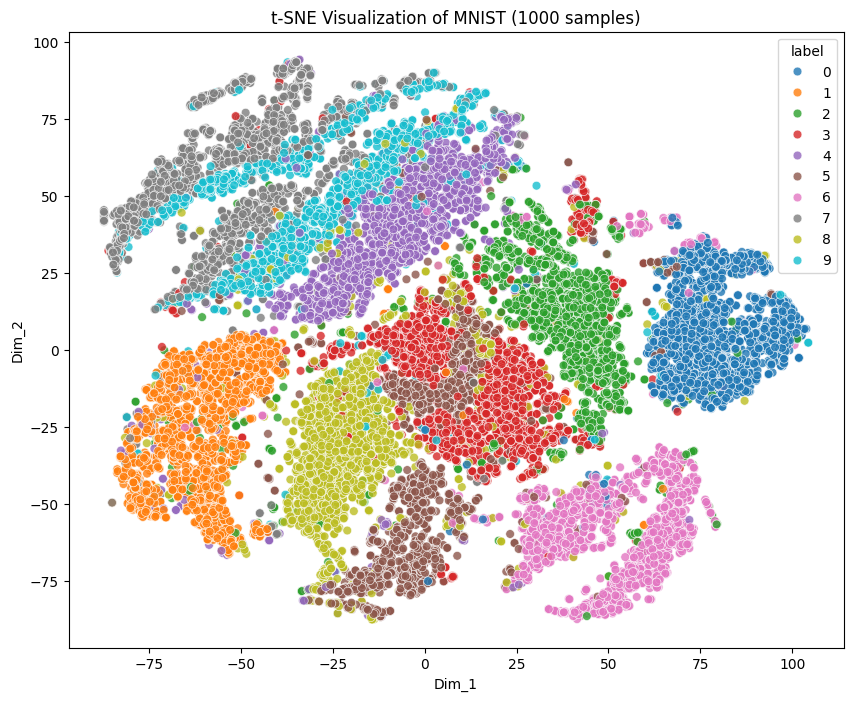

In [ ]:
#T-distributed Stochastic Neighbor Embedding (t-SNE)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

d = mnist.data
l = mnist.target

df = pd.DataFrame(d)
df['label'] = l

scaler = StandardScaler()
X_scaled = scaler.fit_transform(d)

print("Scaled data shape:", X_scaled.shape)

X_20000 = X_scaled[:20000]
y_20000 = l[:20000]

tsne = TSNE(n_components=2, random_state=100, init='pca')

X_tsne = tsne.fit_transform(X_20000)

tsne_df = pd.DataFrame({"Dim_1": X_tsne[:, 0], "Dim_2": X_tsne[:, 1], "label": y_20000})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=tsne_df,
    x="Dim_1",
    y="Dim_2",
    hue="label",
    palette="tab10",
    s=40,
    alpha=0.8,
    legend="full"
)

plt.title("t-SNE Visualization of MNIST (1000 samples)")
plt.show()

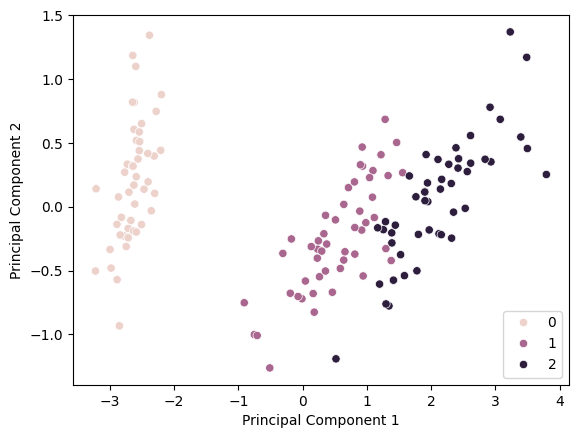

In [60]:
#Mini Project: 2D visualizer

from sklearn.decomposition import PCA

df=pd.read_csv("D:\\AppStoneLab\\Day-wise\\Day 2\\Iris.csv")

X=df.drop(columns=['Species', 'Id'], axis=1)
y=df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame({"Dim_1": X_pca[:, 0], "Dim_2": X_pca[:, 1], "label": y})

sns.scatterplot(data=df_pca, x="Dim_1", y="Dim_2", hue="label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [90]:
#Filter Methods for feature selection

from sklearn.feature_selection import VarianceThreshold

df=pd.read_csv('D:\\AppStoneLab\\Day-wise\\Day 4\\autos.csv')
num_cols=df.select_dtypes(include='int')
df=pd.DataFrame(num_cols)

print("original data shape: ",df.shape)

selector=VarianceThreshold(threshold=1)
df_select_vt=selector.fit_transform(df)
print("df shape after variance thresholding",df_select_vt.shape)
# selected_cols=selector.get_feature_names_out()
# print("selected columns",selected_cols)

corr=df.corr()['price'].drop('price')
select_ct=corr[corr.abs()>0.1].index
df_select_ct=df[select_ct]
print("df shape after correlation thresholding",df_select_ct.shape)

original data shape:  (193, 11)
df shape after variance thresholding (193, 10)
df shape after correlation thresholding (193, 7)


In [121]:
#embedded methods for feature selection

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

df=pd.read_csv('D:\\AppStoneLab\\Day-wise\\Day 4\\autos.csv')
num_cols=df.select_dtypes(include='int64')
df=pd.DataFrame(num_cols)

X=df.drop(columns=['price'], axis=1)
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

print("All columns: \n",X.columns.tolist())

model=Lasso(alpha=150)
model.fit(X_train,y_train)
# y_pred=model.predict(X_test)

# r2=r2_score(y_test, y_pred)

selected_features = X.columns[model.coef_ != 0]
print("Selected Features: \n", selected_features.tolist())

# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]

# model1=Lasso(alpha=0)
# model1.fit(X_train_selected, y_train)
# y_pred=model1.predict(X_test_selected)

# r2_selected=r2_score(y_test, y_pred)

# print("R2 score before selection: ",r2)
# print("R2 score after selection: ",r2_selected)


All columns: 
 ['symboling', 'num_of_doors', 'curb_weight', 'num_of_cylinders', 'engine_size', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']
Selected Features: 
 ['num_of_doors', 'curb_weight', 'engine_size', 'compression_ratio', 'horsepower', 'peak_rpm', 'highway_mpg']


Accuracy:  0.958041958041958
F1 score:  [0.96590909 0.94545455]


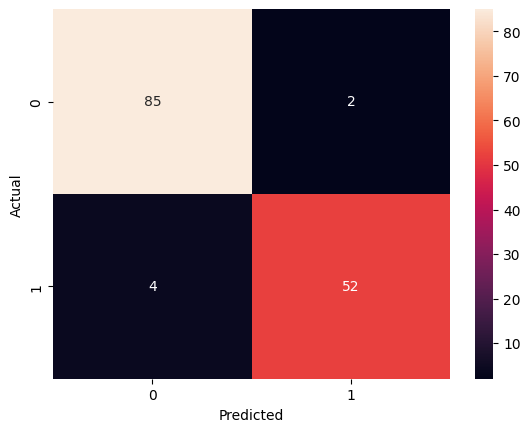

selected features:
 ['area_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Accuracy:  0.965034965034965
F1 score:  [0.97142857 0.95495495]


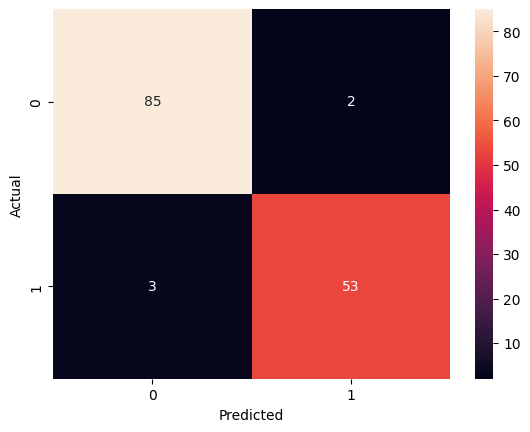

In [135]:
#Mini Project: The selector

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

df=pd.read_csv("breast-cancer.csv")
X=df.drop(columns=['id', 'diagnosis'], axis=1)
y=df['diagnosis'].map({'M':1, 'B':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

rf=RandomForestClassifier(n_estimators=100, random_state=100)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

ac=accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred, average=None)
cm=confusion_matrix(y_true=y_test, y_pred=y_pred)

print("Accuracy: ",ac)
print("F1 score: ",f1)
sns.heatmap(cm, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


rfe=RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)
y_pred_rfe=rfe.predict(X_test)
selected=rfe.support_

print("selected features:\n", X.columns[selected].tolist())

X_selected=X[X.columns[selected]]
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.25, random_state=100)

rf_selected=RandomForestClassifier(n_estimators=100, random_state=100)
rf_selected.fit(X_train_selected, y_train_selected)
y_pred_selected=rf_selected.predict(X_test_selected)

ac_selected=accuracy_score(y_test_selected, y_pred_selected)
f1_selected=f1_score(y_test_selected, y_pred_selected, average=None)
cm_selected=confusion_matrix(y_true=y_test_selected, y_pred=y_pred_selected)

print("Accuracy: ",ac_selected)
print("F1 score: ",f1_selected)
sns.heatmap(cm_selected, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()